# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [5]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 100
page_size = 500

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")
    
    

Scraping page 1
   ---> 500 total reviews
Scraping page 2
   ---> 1000 total reviews
Scraping page 3
   ---> 1500 total reviews
Scraping page 4
   ---> 2000 total reviews
Scraping page 5
   ---> 2500 total reviews
Scraping page 6
   ---> 3000 total reviews
Scraping page 7
   ---> 3500 total reviews
Scraping page 8
   ---> 3586 total reviews
Scraping page 9
   ---> 3586 total reviews
Scraping page 10
   ---> 3586 total reviews
Scraping page 11
   ---> 3586 total reviews
Scraping page 12
   ---> 3586 total reviews
Scraping page 13
   ---> 3586 total reviews
Scraping page 14
   ---> 3586 total reviews
Scraping page 15
   ---> 3586 total reviews
Scraping page 16
   ---> 3586 total reviews
Scraping page 17
   ---> 3586 total reviews
Scraping page 18
   ---> 3586 total reviews
Scraping page 19
   ---> 3586 total reviews
Scraping page 20
   ---> 3586 total reviews
Scraping page 21
   ---> 3586 total reviews
Scraping page 22
   ---> 3586 total reviews
Scraping page 23
   ---> 3586 total review

In [7]:
df = pd.DataFrame()
df["reviews"] = reviews
df

,reviews
0,✅ Trip Verified | After travelling London to ...
1,✅ Trip Verified | My luggage was mis-tagged i...
2,✅ Trip Verified | The airline lost my luggage...
3,✅ Trip Verified | We booked on the BA website...
4,✅ Trip Verified | First time flying with BA b...
...,...
3581,Flew LHR - VIE return operated by bmi but BA a...
3582,LHR to HAM. Purser addresses all club passenge...
3583,My son who had worked for British Airways urge...
3584,London City-New York JFK via Shannon on A318 b...


In [5]:
df.to_csv("data/BA_reviews.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'data/BA_reviews.csv'

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [8]:
df['reviews'] = df['reviews'].astype('string')

In [9]:
import re
import string
from nltk.corpus import stopwords
punc = string.punctuation


def cleaner(description):
    
    description = description.lower()
    description = description.strip()
    
    description = re.sub('[,\.!?]'," ",description)
    description = re.sub("[^a-zA-Z\s]+"," ",description)
    description = re.sub("(^|\W)\d+($|\W)","",description)
    description = re.sub("✅ Trip Verified","",description)
    
    
    return description

In [12]:
def remove_punctuations(text):
    
    for char in string.punctuation:
        text = text.replace(char, '')
    return text

        

df['reviews'] = df['reviews'].apply(remove_punctuations)

In [13]:
df['reviews'] = df['reviews'].apply(cleaner)

words = ''.join([char for char in df['reviews']])

In [14]:
from nltk.corpus import stopwords
stop = stopwords.words('english')


df['reviews_no_stop']=' '.join([word for word in words.split() if word not in stop])
df['reviews_no_stop'][1]

'trip verified travelling london madrid british airways iberia madrid lima latam cuzco luggage arrived days attempting collect luggage mine one arrive sought help informed make claim online bag finally arrived days later lock forced open everything inside case searched someone emptied st aid kit toiletries threw clothing felt violated treated appallingly start finish month back forth british airways yet stated fault trip verified luggage mistagged dallas way cairo via london luggage arrived lhr planned saturday however upon arrival due luggage mistagged incorrect name luggage never sent cairo sitting terminal lhr air tag luggage british airways saying nothing filed claims made phone calls hung x simple solve problem workers ba refuse solve problem trip verified airline lost luggage absolutely awful throughout entire trip gave updates website sucks nearly impossible get someone phone finally delivered luggage hotel left go back us days told ship back us calling everyday begging get bag 

In [ ]:
# remove most frequent words

freq10=pd.Series(' '.join(df['reviews_no_stop']).split()).value_counts()[:10]


In [1]:
df['reviews_clean']=df['review_no_stop'].apply(lambda x:' '.join([word for word in x.split() if word not in (freq10)]))

NameError: name 'df' is not defined

In [ ]:
# function for checking popular words



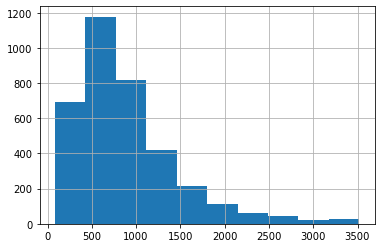

In [10]:
# number of characters in each sentence

df['reviews'].str.len().hist()


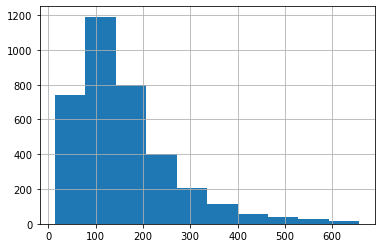

In [12]:
# number of words appearing in each review

df['reviews'].str.split().map(lambda x: len(x)).hist()


In [13]:
# check the average word length in each sentence

df['reviews'].str.split().
    apply(lambda x: [len(i) for i in x]).
    map(lambda x: np.mean(x).hist()
        

SyntaxError: invalid syntax (<ipython-input-13-03386274a9e2>, line 3)

In [15]:
import nltk
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /Users/xugao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
corpus=[]
review = df['reviews'].str.split()
review = review.tolist()

corpus=[word for i in review for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
        

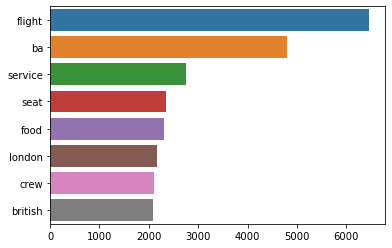

In [21]:
# count and store occurence of each word in a list of tuples

import seaborn as sns
import collections
counter=collections.Counter(corpus)
most = counter.most_common()

x, y = [],[]
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
sns.barplot(x=y,y=x)

In [17]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n,n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                   for word, idx in vec.vocabulary_.items()]
    word_freq  = sorted(words_freq, key = lambda x: x[1],
                       reverse=True)
    
    return words_freq[:10]

In [18]:
top_n_bigrams=get_top_ngrams(df['reviews'],2)[:10]
x,y=map(list,zip(top_n_bigrams))
sns.barplot(x=y,y=x)



ValueError: too many values to unpack (expected 2)

In [21]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [22]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

def preprocess_news(df):
    corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for i in df['reviews']:
        words=[w for w in word_tokenize(i) if (w not in stop)]
        
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        
        corpus.append(words)
        
    return 

corpus=preprocess_news(i)




[nltk_data] Downloading package punkt to /Users/xugao/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/xugao/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


NameError: name 'WordNetLemmatizer' is not defined